In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset from CSV
file = "play_tennis.csv"
df = pd.read_csv(file)

encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Encode the target column
target_encoder = LabelEncoder()
df['play'] = target_encoder.fit_transform(df['play'])

# Split data into features (X) and target (Y)
X = df.drop(columns=['play'])  # Features
Y = df['play']  # Target variable

# Split dataset into training & testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [3]:
# Initialize and train Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", random_state=42)  # You can change "entropy" to "gini"
model.fit(X_train, Y_train)

## Check model accuracy
#accuracy = model.score(X_test, Y_test)
#print(f"Model Accuracy: {accuracy:.2f}")


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Get Node Sample Support
print("Support (Number of Samples in Each Node):")
print(model.tree_.value[:, :, 0]) 


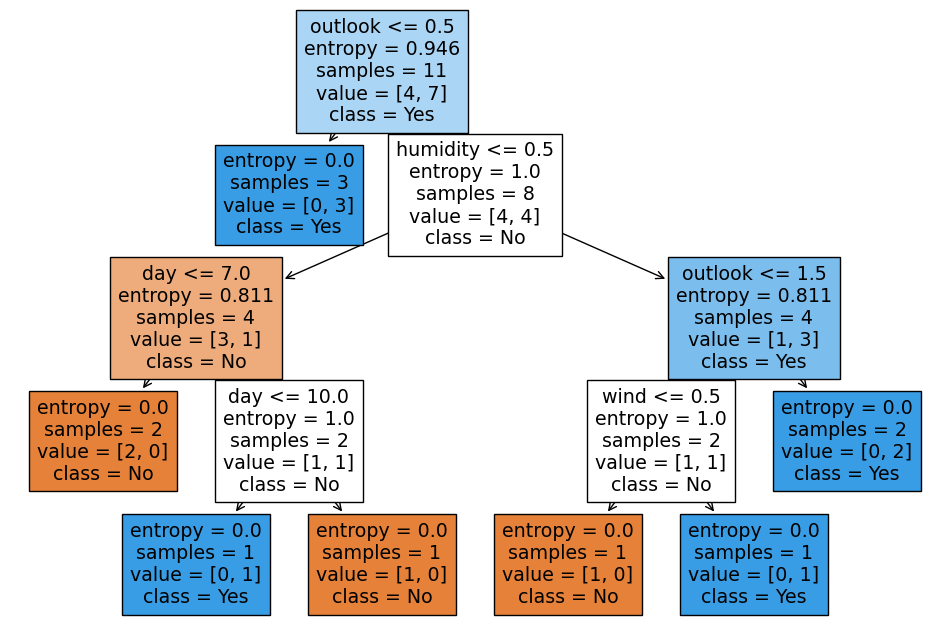

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True)
plt.show()



In [ ]:
# Predict on test set
Y_pred = model.predict(X_test)

# Convert predictions back to original labels
Y_pred_labels = target_encoder.inverse_transform(Y_pred)

# Show predictions alongside actual values
results = pd.DataFrame({
    'Actual': target_encoder.inverse_transform(Y_test),
    'Predicted': Y_pred_labels
})

print(results)



   Actual  Predicted
0       1          1
1       1          1
2       0          0


In [ ]:
# Predict on test set
Y_pred = model.predict(X_test)

print("\nTest Set and Predictions:")
test_results = X_test.copy()  # Copy test set
test_results['Actual Play'] = Y_test  # Add actual labels
test_results['Predicted Play'] = Y_pred  # Add predicted labels

# Convert encoded values back to original labels
test_results['Actual Play'] = encoders['play'].inverse_transform(test_results['Actual Play'])
test_results['Predicted Play'] = encoders['play'].inverse_transform(test_results['Predicted Play'])

# Convert feature values back to original categories
for col in X_test.columns:
    test_results[col] = encoders[col].inverse_transform(test_results[col])

# Print the test results
print(test_results)


Test Set and Predictions:
    day   outlook  temp humidity    wind Actual Play Predicted Play
9   D10      Rain  Mild   Normal    Weak         Yes            Yes
11  D12  Overcast  Mild     High  Strong         Yes            Yes
0    D1     Sunny   Hot     High    Weak          No             No
